<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Di aplikasi tersebut, kamu bisa menemukan harga pasaran sebuah mobil. Kamu memiliki akses ke data historis: spesifikasi, versi, dan harga kendaraan. Kamu perlu membuat model untuk menentukan nilainya. 

Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Persiapan-Data" data-toc-modified-id="Persiapan-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Persiapan Data</a></span><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Explorasi-Data-dan-Data-Adjustment" data-toc-modified-id="Explorasi-Data-dan-Data-Adjustment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explorasi Data dan Data Adjustment</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Split Data</a></span></li></ul></li><li><span><a href="#Pelatihan-Model" data-toc-modified-id="Pelatihan-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pelatihan Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBooost" data-toc-modified-id="CatBooost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>CatBooost</a></span></li></ul></li><li><span><a href="#Analisis-model" data-toc-modified-id="Analisis-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analisis model</a></span></li></ul></div>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

## Persiapan Data

### Import Data

In [ ]:
data = pd.read_csv('/datasets/autos.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Sebelum memulai pembuatan model, langkah yang dilakukan pertama kali adalah mengecek data yang ada, dan mempelajari maksud dari datanya.

### Explorasi Data dan Data Adjustment

In [ ]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Karena pelatihan model ini bertujuan untuk mencari harga pasar dari sebuah mobil. Sehingga nanti ketika ada mobil yang akan didaftarkan, bisa diprediksi harga mobilnya berapa dengan melihat fitur dari mobil itu.

Namun sebelum lebih lanjut, ada beberapa fitur yang tidak diperlukan dalam pengembangan model ini, yaitu

1. DateCrawled
2. DateCreated
3. PostalCode
4. LastSeen

Meskipun beberapa orang akan menanyakan kapan terakhir dipakai, dan kapan pertama dibeli, namun semua itu bisa diwakilkan dengan kilometer, dengan makna seberapa sering mobil tersebut dipakai. Dan juga ada kolom NotRepaired yang mana itu bisa mewakilkan kondisi mobil tersebut secara umum. Jadi fitur yang akan digunakan untuk menjawab pertanyaan tersebut adalah seberapa sering mobil itu dipakai (Kilometer) dan apakah sudah pernah diperbaiki (Kondisi mobil itu terlepas dari foto yang bisa dilihat dengan mata kepala sendiri).

Untuk PostalCode sendiri tidak memiliki makna yang terlalu berarti untuk pengembangan model, dengan nilainya yang bermacam macam sesuai daerah dan tidak bisa diperingkatkan, maka PostalCode akan didrop juga dari fitur.

In [ ]:
data = data.drop(['DateCrawled','DateCreated','PostalCode','LastSeen'], axis=1)
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,0
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,0
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,0
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,0
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,0


Selain dari data yang sudah di drop, kita cek ada berapa macam data yang berbeda didalam data yang disediakan.

In [ ]:
for i in range(len(data.columns)):
    print (f'{data.columns[i]} memiliki data unique sebanyak {len(data[data.columns[i]].unique())}')

Price memiliki data unique sebanyak 3731
VehicleType memiliki data unique sebanyak 9
RegistrationYear memiliki data unique sebanyak 151
Gearbox memiliki data unique sebanyak 3
Power memiliki data unique sebanyak 712
Model memiliki data unique sebanyak 251
Kilometer memiliki data unique sebanyak 13
RegistrationMonth memiliki data unique sebanyak 13
FuelType memiliki data unique sebanyak 8
Brand memiliki data unique sebanyak 40
NotRepaired memiliki data unique sebanyak 3
NumberOfPictures memiliki data unique sebanyak 1


NumberOfPictures hanya memiliki 1 data unique, yang berarti semua data nilai NumberOfPicturesnya selalu sama. Dengan kata lain, Number of Pictures bisa didrop juga dari data.

In [ ]:
data = data.drop('NumberOfPictures',axis=1)
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


Sekarang data dicek secara umum.

In [ ]:
cek = data['RegistrationYear'].value_counts()
cek[cek>10].sort_values()

1937       11
1954       11
1951       12
1957       13
1953       14
        ...  
2006    19900
2001    20124
2005    22109
1999    22728
2000    24490
Name: RegistrationYear, Length: 74, dtype: int64

In [ ]:
cek = data['Power'].value_counts()
cek[cek>10].sort_index()

0      40225
1         34
4         30
5        103
6         11
       ...  
445       11
450       85
476       31
500       39
507       13
Name: Power, Length: 302, dtype: int64

Ada nilai yang aneh pada Registration year, dan Power.
Untuk Registration year tidak mungkin nilainya adalah 1000 karena tahun ditemukannya mobil saja adalah 1769, itu pun masih menggunakan tenaga uap. Dengan mempertimbangkan kemajuan mobil yang berkembang pesat di awal abad ke 20. Namun setelah diteliti lebih dalam ada beberapa mobil yang RegistrationYearnya sangat kecil, sehingga diambil saat awal mobil memiliki RegistrationYear sama lebih dari 10.  Maka data akan difilter diatas tahun 1950 dan dibawah tahun 2025.

Untuk Power sendiri, setidaknya dari data yang saya baca, mobil pertama saja (Rolls-Royce 10 hp) memiliki 10 hp(horsepower) dan setelah dilihat lebih lanjut, nilai Power yang lebih dari 10 pun lumayan banyak. Untuk nilai maksimal Powernya sendiri tidak lebih dari 2500 hp karena setelah dicari tentang perkembangan mobil, Power yang paling tinggi ada disekitaran 2000an dan tidak lebih dari 2500. Jadi data akan difilter dengan nilai minimal adalah 10 dan maksimal 2500.

In [ ]:
data = data.query('RegistrationYear < 2025 & RegistrationYear > 1955')
data = data.query('Power < 2500 & Power > 10')
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,313673.000000,313673.000000,313673.000000,313673.000000,313673.000000
mean,4704.064159,2003.266127,121.276897,128576.415567,5.935133
std,4589.941150,6.915366,65.922348,36721.180155,3.615614
min,0.000000,1956.000000,11.000000,5000.000000,0.000000
25%,1250.000000,1999.000000,75.000000,125000.000000,3.000000
50%,2999.000000,2003.000000,110.000000,150000.000000,6.000000
75%,6890.000000,2008.000000,150.000000,150000.000000,9.000000
max,20000.000000,2019.000000,2461.000000,150000.000000,12.000000


Karena untuk harga masih belum bisa ditentukan secara presisi, maka filtering yang akan digunakan adalah dengan mengabaikan outlier pada harganya.

Untuk batas minimal bawah yang akan digunakan adalah 450 euros, hal ini dikarenakan mobil murah yang memang masih berfungsi dengan baik dengan kondisi yang layak setidaknya ada di harga 500 euros. Maka dari itu, 450 euros akan ditetapkan sebagai batas bawahnya.

<AxesSubplot:>

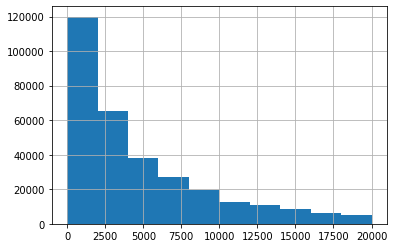

In [ ]:
data['Price'].hist()

In [ ]:
def q75(data):
    return data.quantile(0.75)
def q25(data):
    return data.quantile(0.25)
def iqr(data):
    return q75(data) - q25(data)

#BATAS ATAS OUTLIER
max_price = (q75(data['Price'])+(1.5*iqr(data['Price'])))
#BATAS BAWAH OUTLIER
min_price = 450

#AMBIL DATA FILTER
data = data.query('Price < @max_price & Price > @min_price')

In [ ]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,276128.000000,276128.000000,276128.000000,276128.000000,276128.000000
mean,4434.620795,2003.281514,120.270230,129815.683306,6.024297
std,3696.260522,6.669189,62.928976,35254.039372,3.577022
min,455.000000,1956.000000,11.000000,5000.000000,0.000000
25%,1500.000000,1999.000000,80.000000,125000.000000,3.000000
50%,3200.000000,2003.000000,110.000000,150000.000000,6.000000
75%,6500.000000,2007.000000,147.000000,150000.000000,9.000000
max,15349.000000,2019.000000,2461.000000,150000.000000,12.000000


Untuk Kilometer tidak ada yang bisa dilakukan lebih lanjut karena mediannya saja sama dengan nilai maksimumnya. Untuk Registration Month kita hilangkan nilai 0 nya. Karena bulan apa yang menandakan bulan ke 0?

In [ ]:
data = data.query('RegistrationMonth !=0')

In [ ]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no


In [ ]:
data.isnull().sum()/data.shape[0]

Price                0.000000
VehicleType          0.053162
RegistrationYear     0.000000
Gearbox              0.014368
Power                0.000000
Model                0.032783
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.048447
Brand                0.000000
NotRepaired          0.124258
dtype: float64

Nilai yang paling besar ada di kolom not repaired yaitu 12%. Sedangkan yang lainnya ada di sekitar 5%.

Nilai null ini akan diisi dengan 'Unknown'. Karena nilai unknown dalam jual beli barang akan bisa berpengaruh terhadap harga.

In [ ]:
data.fillna('unknown', inplace=True)

In [ ]:
data.isnull().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
dtype: int64

Sip, data sudah diperbaiki.

### Encoding

Karena ada beberapa data yang merupakan data kategorikal, maka dilakukan encoding dengan menggunakan One Hot Encoding, karena regresi linear tidak bisa memproses langsung data kategorikal.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260015 entries, 2 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              260015 non-null  int64 
 1   VehicleType        260015 non-null  object
 2   RegistrationYear   260015 non-null  int64 
 3   Gearbox            260015 non-null  object
 4   Power              260015 non-null  int64 
 5   Model              260015 non-null  object
 6   Kilometer          260015 non-null  int64 
 7   RegistrationMonth  260015 non-null  int64 
 8   FuelType           260015 non-null  object
 9   Brand              260015 non-null  object
 10  NotRepaired        260015 non-null  object
dtypes: int64(5), object(6)
memory usage: 23.8+ MB


In [ ]:
categorical = [
    'VehicleType',
    'Gearbox', 
    'Model',
    'FuelType', 
    'Brand',
    'NotRepaired']

Namun Dikarenakan jika kita encode semua data kategorik akan menambah banyak kolom. Jadi beberapa kolom akan dikecualikan dalam encoding ini. Sebelumnya, memang inilah kelemahan regresi linear, tidak bisa memproses data yang memiliki kategorik yang sangat banyak seperti model dan brand. Namun sebelum itu dicek terlebih dahulu ada berapa banyak tipe kategori yang ada pada data.

In [ ]:
for i in categorical:
    print(f'Kolom {i} memiliki data unik sebanyak {data[i].value_counts().count()}')
    print('-----------------')

Kolom VehicleType memiliki data unik sebanyak 9
-----------------
Kolom Gearbox memiliki data unik sebanyak 3
-----------------
Kolom Model memiliki data unik sebanyak 250
-----------------
Kolom FuelType memiliki data unik sebanyak 8
-----------------
Kolom Brand memiliki data unik sebanyak 40
-----------------
Kolom NotRepaired memiliki data unik sebanyak 3
-----------------


In [ ]:
data['Brand'].unique()

array(['jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda',
       'renault', 'mercedes_benz', 'opel', 'citroen', 'honda', 'fiat',
       'mini', 'smart', 'hyundai', 'seat', 'audi', 'nissan', 'subaru',
       'volvo', 'mitsubishi', 'alfa_romeo', 'kia', 'suzuki', 'lancia',
       'toyota', 'chevrolet', 'dacia', 'daihatsu', 'chrysler',
       'sonstige_autos', 'jaguar', 'rover', 'porsche', 'saab', 'daewoo',
       'trabant', 'land_rover', 'lada'], dtype=object)

In [ ]:
data['Model'].unique()

array(['grand', 'golf', 'fabia', '3er', '2_reihe', 'c_max', '3_reihe',
       'passat', 'twingo', 'a_klasse', 'scirocco', '5er', 'meriva',
       'other', 'c4', 'civic', 'transporter', 'punto', 'e_klasse', 'clio',
       'one', 'fortwo', '1er', 'b_klasse', 'a8', 'jetta', 'astra',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a1', 'focus', 'a4', 'tt', 'a6',
       'jazz', 'polo', 'slk', '7er', 'combo', '80', '147', 'unknown',
       'z_reihe', 'sportage', 'sorento', 'ibiza', 'eos', 'touran', 'getz',
       'insignia', 'ka', 'almera', 'megane', 'a3', 'lupo', 'mondeo',
       'cordoba', 'colt', 'corsa', 'vectra', 'berlingo', 'tiguan',
       '6_reihe', 'panda', 'up', 'i_reihe', 'ceed', 'kangoo', 'yeti',
       'octavia', 'zafira', 'mii', 'rx_reihe', 'fox', 'matiz', 'beetle',
       'rio', 'logan', 'caddy', 'spider', 'omega', 'cuore', 's_max',
       'modus', 'a2', 'c3', 's_klasse', '1_reihe', 'sharan', 'avensis',
       'vian

Data diatas jika menggunakan One Hot Encoding tidak akan berjalan dengan lancar karena menjadikan kolom yang sangat banyak, sehingga akan menambahkan beban pada processor. Jika ingin grouping per jumlah yang ada misalkan Brand dengan jumlah lebih dari 500 Masuk ke Common, diantara 100-500 masuk ke Rare, dan dibawah 100 menjadi Super Rare pun tidak bisa, karena tidak akan terlalu berarti. Bisa saja yang Commmon malah lebih mahal dibandingkan yang Super Rare. Maka dari itu untuk tujuan penggunaan Machine Learning dengan algoritma regresi linear, fitur ini akan di drop.

In [ ]:
ohe = data.drop(['Model','Brand'] ,axis = 1)
ohe = pd.get_dummies(ohe, drop_first=True)
ohe.head()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,...,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,NotRepaired_unknown,NotRepaired_yes
2,9800,2004,163,125000,8,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1500,2001,75,150000,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3600,2008,69,90000,7,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,650,1995,102,150000,10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
6,2200,2004,109,150000,8,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Data One Hot Encoding ini hanya akan bekerja pada algoritma regresi linear, karena dalam regresi linear bisa mengakses semua fitur dalam satu waktu sehingga seluruh nilai fitur yang merupakan 0 1 0 1 dapat diakses dengan baik oleh regresi linear, namun tidak untuk model yang berbasis pohon. Model berbasis pohon ini hanya akan memproses 1 fitur dalam satu waktu, dan jika fitur itu tidak cocok maka dicarikan yang cocoknya dan seterusnya. Sehingga untuk model berbasis pohon akan menggunakan Ordinal Encoding. RandomForest Regressor adalah model yang akan dipilih untuk model berbasis pohon.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = data.copy()
ordinal[categorical] = OrdinalEncoder().fit_transform(ordinal[categorical])

ordinal.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
2,9800,6.0,2004,0.0,163,117.0,125000,8,2.0,14.0,1.0
3,1500,5.0,2001,1.0,75,116.0,150000,6,6.0,38.0,0.0
4,3600,5.0,2008,1.0,69,101.0,90000,7,2.0,31.0,0.0
5,650,4.0,1995,1.0,102,11.0,150000,10,6.0,2.0,2.0
6,2200,1.0,2004,1.0,109,8.0,150000,8,6.0,25.0,0.0


Sekarang saatnya split data Training, Valid, dan Test.

### Split Data

Dikarenakan sumber data yang digunakan berbeda untuk masing masing model.
1. Linear Regression dan XGBoost menggunakan data OHE.
2. RandomForest Regressor menggunakan data ordinal.
3. LightGBM dan CatBoost menggunakan data mentah.

Maka Split data ini akan diambil berdasarkan index dari split data yang pertama, sehingga data yang digunakan tetap sama.

In [ ]:
from sklearn.model_selection import train_test_split

index_train, index_sisa = train_test_split(data.index, train_size=0.7, random_state=1)
index_valid, index_test = train_test_split(index_sisa, train_size=0.6666, random_state=1)

print(len(index_train)/(len(data)))
print(len(index_valid)/len(data))
print(len(index_test)/len(data))

0.6999980770340173
0.19998077034017267
0.10002115262581004


Train = 70%
Valid = 20%
Test  = 10%

In [ ]:
def data_split(data):
    train = data.loc[index_train]
    valid = data.loc[index_valid]
    test = data.loc[index_test]
    return train,valid,test

def features_target_split(data):
    features = data.drop(['Price'],axis=1)
    target = data['Price']
    return features, target

In [ ]:
ohe_train, ohe_valid, ohe_test = data_split(ohe)
ordinal_train, ordinal_valid, ordinal_test = data_split(ordinal)
data_train, data_valid, data_test = data_split(data)

## Pelatihan Model

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(pred, real):
    return mean_squared_error(pred, real)**0.5

In [ ]:
from sklearn.dummy import DummyRegressor
features_train, target_train = features_target_split(ohe_train)
features_valid, target_valid = features_target_split(ohe_valid)
features_test, target_test = features_target_split(ohe_test)
dr = DummyRegressor(strategy="mean")
dr.fit(features_train, target_train)
rmse(dr.predict(features_valid), target_valid)

3719.3224882032114

RMSE model dummy didapatkan 3719.

### Linear Regression

In [ ]:
%%time

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(features_train, target_train)

CPU times: user 240 ms, sys: 70.7 ms, total: 311 ms
Wall time: 269 ms


LinearRegression()

In [ ]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

CPU times: user 43.7 ms, sys: 40.9 ms, total: 84.6 ms
Wall time: 33.6 ms


In [ ]:
print("Train RMSE:", rmse(target_train, pred_train))
print("Valid RMSE:", rmse(target_valid, pred_valid))
print("Test RMSE: ", rmse(target_test, pred_test))

Train RMSE: 2543.5518738419346
Valid RMSE: 2537.9302687442573
Test RMSE:  2564.530177498815


Linear Regression memanglah cepat dalam memproses, namun akurasi yang didapatkan tidak terlalu mengesankan.

### XGBoost

In [ ]:
%%time
import xgboost as xg

model = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
model.fit(features_train, target_train)

[13:52:30] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 4.47 s, sys: 25.9 ms, total: 4.49 s
Wall time: 4.45 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [ ]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

CPU times: user 379 ms, sys: 1.78 ms, total: 381 ms
Wall time: 285 ms


In [ ]:
print("Train RMSE:", rmse(target_train, pred_train))
print("Valid RMSE:", rmse(target_valid, pred_valid))
print("Test RMSE: ", rmse(target_test, pred_test))

Train RMSE: 1731.3934089379504
Valid RMSE: 1748.3885699652574
Test RMSE:  1749.1569283690408


Dalam training, waktu yang dibutuhkan XGBoost lebih banyak dibanding dengan Linear Regression, begitu pula dengan waktu yang dibutuhkan saat prediksi jawaban.

### Random Forest

Karena data yang digunakan menggunakan encoding ordinal, jangan lupa untuk mensetting ulang data yang akan digunakan.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
features_train, target_train = features_target_split(ordinal_train)
features_valid, target_valid = features_target_split(ordinal_valid)
features_test, target_test = features_target_split(ordinal_valid)

Untuk pertama, kita cari terlebih dahulu hiperparameter yang cocok untuk RandomForest sebelum menghitung waktu yang dibutuhkan dalam prosesnya.

In [ ]:
for i in [1, 2, 4, 6, 8, 10]:
    for n in [50, 100, 150, 200, 250]:
        model = RandomForestRegressor(max_depth=i, n_estimators=n)
        model.fit(features_train, target_train)

        pred_train = model.predict(features_train)
        pred_valid = model.predict(features_valid)
        print("Depth:", i)
        print("Estimator:", n)
        print("Train RMSE:", rmse(target_train, pred_train))
        print("Valid RMSE:", rmse(target_valid, pred_valid))

Depth: 1
Estimator: 50
Train RMSE: 3052.301132164857
Valid RMSE: 3035.109415444367
Depth: 1
Estimator: 100
Train RMSE: 3052.3012385246966
Valid RMSE: 3035.104902472054
Depth: 1
Estimator: 150
Train RMSE: 3052.301186531985
Valid RMSE: 3035.1060874453797
Depth: 1
Estimator: 200
Train RMSE: 3052.301155172939
Valid RMSE: 3035.111358005913
Depth: 1
Estimator: 250
Train RMSE: 3052.3011887535795
Valid RMSE: 3035.108905377808
Depth: 2
Estimator: 50
Train RMSE: 2703.2015255770048
Valid RMSE: 2680.9210937725566
Depth: 2
Estimator: 100
Train RMSE: 2705.659632612215
Valid RMSE: 2682.6816177225037
Depth: 2
Estimator: 150
Train RMSE: 2704.9376950992114
Valid RMSE: 2682.0641151958457
Depth: 2
Estimator: 200
Train RMSE: 2704.8119069601053
Valid RMSE: 2681.9529159501244
Depth: 2
Estimator: 250
Train RMSE: 2705.8480362128203
Valid RMSE: 2682.7999324695893
Depth: 4
Estimator: 50
Train RMSE: 2248.488543954931
Valid RMSE: 2238.7198443007596
Depth: 4
Estimator: 100
Train RMSE: 2242.116971372133
Valid RMSE: 

n_estimators yang paling baik disini adalah 100. Namun untuk depth, kualitas model masih meningkat seiring dengan peningkatan depthnya meskipun sudah 10. Dicek kembali hingga 20 dengan n_estimators yang sama yaitu 100.

In [ ]:
for i in range(1,20):
    model = RandomForestRegressor(max_depth=i, n_estimators=100)
    model.fit(features_train, target_train)

    pred_train = model.predict(features_train)
    pred_valid = model.predict(features_valid)
    print("Depth:", i)
    print("Train RMSE:", rmse(target_train, pred_train))
    print("Valid RMSE:", rmse(target_valid, pred_valid))

Depth: 1
Train RMSE: 3052.301269257433
Valid RMSE: 3035.103649211854
Depth: 2
Train RMSE: 2707.686463183771
Valid RMSE: 2684.4473495773354
Depth: 3
Train RMSE: 2467.6863572418556
Valid RMSE: 2452.778000008302
Depth: 4
Train RMSE: 2244.8626238162124
Valid RMSE: 2235.667403788819
Depth: 5
Train RMSE: 2087.712376169969
Valid RMSE: 2086.312003661434
Depth: 6
Train RMSE: 1943.3280420086992
Valid RMSE: 1953.191763312808
Depth: 7
Train RMSE: 1832.0712093313527
Valid RMSE: 1848.5700668023608
Depth: 8
Train RMSE: 1739.956223995837
Valid RMSE: 1768.6861111240155
Depth: 9
Train RMSE: 1656.0171140595758
Valid RMSE: 1705.454544411981
Depth: 10
Train RMSE: 1567.6803737714804
Valid RMSE: 1642.3258002605928
Depth: 11
Train RMSE: 1475.4332411056869
Valid RMSE: 1586.007756778946
Depth: 12
Train RMSE: 1381.8638921686886
Valid RMSE: 1536.0150931973053
Depth: 13
Train RMSE: 1286.5813044626173
Valid RMSE: 1493.1394145656393
Depth: 14
Train RMSE: 1196.7248169611898
Valid RMSE: 1456.6943852547531
Depth: 15
Tr

Ternyata sampe 19 pun kualitas model masih meningkat.

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
print("Train RMSE:", rmse(target_train, pred_train))
print("Valid RMSE:", rmse(target_valid, pred_valid))

Depth: 19
Estimator: 250
Train RMSE: 648.7455633565284
Valid RMSE: 1400.024074161706


Dan ternyata nilai default menjadi kualitas model yang terbaik. Hyperparameter ini settingan defaultnya adalah None.
Setelah didapatkan Depth dan Estimator terbaik, saatnya menguji kecepatan training dan predict model.

In [ ]:
%%time

model = RandomForestRegressor(n_estimators=100)
model.fit(features_train, target_train)

CPU times: user 1min 5s, sys: 404 ms, total: 1min 6s
Wall time: 1min 6s


RandomForestRegressor()

In [ ]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

CPU times: user 13.3 s, sys: 13 µs, total: 13.3 s
Wall time: 13.3 s


In [ ]:
print("Train RMSE:", rmse(target_train, pred_train))
print("Valid RMSE:", rmse(target_valid, pred_valid))
print("Test RMSE: ", rmse(target_test, pred_test))

Train RMSE: 648.7455633565284
Valid RMSE: 1400.024074161706
Test RMSE:  1400.024074161706


Dilihat dari model sebelumnya, model ini adalah yang terlama, dengan training model sebesar 1 menit 6 detik, dan predict 13 detik.

### LightGBM

Karena data yang akan digunakan adalah data mentah, maka data training, valid, dan test akan diatur ulang

In [ ]:
data_categorical = data.copy()
data_categorical[categorical] = data_categorical[categorical].astype('category')

In [ ]:
import lightgbm as lgb
features_train, target_train = features_target_split(data_categorical)
features_valid, target_valid = features_target_split(data_categorical)
features_test, target_test = features_target_split(data_categorical)

In [ ]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260015 entries, 2 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Price              260015 non-null  int64   
 1   VehicleType        260015 non-null  category
 2   RegistrationYear   260015 non-null  int64   
 3   Gearbox            260015 non-null  category
 4   Power              260015 non-null  int64   
 5   Model              260015 non-null  category
 6   Kilometer          260015 non-null  int64   
 7   RegistrationMonth  260015 non-null  int64   
 8   FuelType           260015 non-null  category
 9   Brand              260015 non-null  category
 10  NotRepaired        260015 non-null  category
dtypes: category(6), int64(5)
memory usage: 21.7 MB


Sama seperti Random Forest,max_depth akan dibuat sama dengan defaultnya, sementara n_estimator akan coba diatur.

In [ ]:
for i in [100,250,500,750, 1000]:
    model = lgb.LGBMRegressor(n_estimators=i, random_state=1)
    model.fit(features_train, target_train, categorical_feature = categorical)
    pred_train = model.predict(features_train)
    pred_valid = model.predict(features_valid)
    print("Estimators:", i)
    print("Train RMSE:", rmse(target_train, pred_train))
    print("Valid RMSE:", rmse(target_valid, pred_valid)) 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Estimators: 100
Train RMSE: 1377.4035830031573
Valid RMSE: 1377.4035830031573


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Estimators: 250
Train RMSE: 1313.8261513353525
Valid RMSE: 1313.8261513353525


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Estimators: 500
Train RMSE: 1259.4233409423753
Valid RMSE: 1259.4233409423753


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Estimators: 750
Train RMSE: 1223.8152504678642
Valid RMSE: 1223.8152504678642


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Estimators: 1000
Train RMSE: 1194.5944118300974
Valid RMSE: 1194.5944118300974


In [ ]:
%%time

model = lgb.LGBMRegressor(n_estimators=1000, random_state=1)
model.fit(features_train, target_train, categorical_feature = categorical)


CPU times: user 1.94 s, sys: 19.9 ms, total: 1.96 s
Wall time: 1.96 s


LGBMRegressor(max_depth=1, random_state=1)

In [ ]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

CPU times: user 1min 8s, sys: 3.11 ms, total: 1min 9s
Wall time: 1min 9s


In [ ]:
print("Train RMSE:", rmse(target_train, pred_train))
print("Valid RMSE:", rmse(target_valid, pred_valid))
print("Test RMSE: ", rmse(target_test, pred_test))

Train RMSE: 1194.5944118300974
Valid RMSE: 1194.5944118300974
Test RMSE:  1194.5944118300974


Untuk training dibutuhkan 1.96 detik, dan untuk predict membutuhkan 1 menit 9 detik

### CatBooost

Hampir sama dengan LightGBM, Metode ini tidak memerlukan proses lebih lanjut untuk data kategorinya.

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
for i in [100, 250, 500, 750, 1000]:
    model = CatBoostRegressor(n_estimators=i, random_state=1, verbose=False)
    model.fit(features_train, target_train, cat_features=categorical)
    pred_train = model.predict(features_train)
    pred_valid = model.predict(features_valid)
    print("Estimators:", i)
    print("Train RMSE:", rmse(target_train, pred_train))
    print("Valid RMSE:", rmse(target_valid, pred_valid)) 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Estimators: 100
Train RMSE: 1418.2778349134974
Valid RMSE: 1418.2778349134974
Estimators: 250
Train RMSE: 1371.1495320588235
Valid RMSE: 1371.1495320588235
Estimators: 500
Train RMSE: 1358.9186949721757
Valid RMSE: 1358.9186949721757
Estimators: 750
Train RMSE: 1352.7166444081047
Valid RMSE: 1352.7166444081047
Estimators: 1000
Train RMSE: 1348.6011126508602
Valid RMSE: 1348.6011126508602


Setelah diteliti dengan iterasi dari 100 hingga 1000. 500 iterasi dinilai sudah cukup karena diatas segitu, waktu yang dibutuhkan sudah tidak worth it lagi ketika dihitung dengan penurunan errornya. Sehingga 500 iterasi lah yang akan dipilih.

In [ ]:
%%time

model = CatBoostRegressor(n_estimators=500, random_state=1, verbose=False)
model.fit(features_train, target_train, cat_features=categorical)

CPU times: user 4min 25s, sys: 189 ms, total: 4min 25s
Wall time: 4min 26s


In [ ]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

CPU times: user 4.36 s, sys: 4.01 ms, total: 4.37 s
Wall time: 4.37 s


In [ ]:
print("Train RMSE:", rmse(target_train, pred_train))
print("Valid RMSE:", rmse(target_valid, pred_valid))
print("Test RMSE: ", rmse(target_test, pred_test))

Train RMSE: 1358.9186949721757
Valid RMSE: 1358.9186949721757
Test RMSE:  1358.9186949721757


## Analisis model

Setelah dibuat 5 model yang berbeda, didapatkan data berikut.

|Model|Training Time| Prediction Time|Test RMSE|Data|
|----|------|--------|------|----|
|Linear Regression|311 ms|84.6 ms| 2564|OHE|
|XGBoost|4.49 s|381 ms|1749|OHE|
|Random Forest|1min 6s|13.3 s|1400|Ordinal Encoding|
|LightGBM|1.96 s|1min 9s|1194|Tanpa Encoding|
|CatBoost|4min 25s|4.37 s|1358|Tanpa Encoding|

Dengan catatan, bahwa pemodelan ini dilakukan di PC saya.

Dan ditemukan bahwa:
1. Model tercepat adalah Linear Regression, namun akurasinya sangat jelek.
2. Model terakurat adalah LightGBM, namun proses prediksinya sangat lama.
3. XGBoost memiliki waktu training dan predict yang lumayan cepat, namun akurasinya masih dibawah yang lain.
4. Random Forest memiliki waktu training yang lumayan lama, dan prediksi yang lumayan lama.
5. CatBoost memiliki waktu training yang SANGAT lama, namun prediksinya lumayan cepat.
6. LightGBM dan CatBoost bisa menjadi solusi jika dataset memiliki fitur kategorik yang sangat banyak, karena tanpa encoding pun, metode ini bisa berjalan dengan baik.
7. Linear Regression bisa menjadi solusi jika dataset yang akan digunakan sangat banyak dan dengan fitur kategorik yang sangat sedikit, meskipun akurasinya dalam kasus ini dinilai terburuk, namun bisa saja di kasus lain yang memang fitur kategoriknya hanya sedikit atau bahkan tidak ada, metode ini akan menjadi yang paling baik.
8. XGBoost masih memerlukan One Hot Encoding dalam pengerjaannya, namun dibandingkan dengan Random Forest, XGBoost bisa dibilang lebih efisien karena memiliki waktu training dan predict yang cepat.
9. LigthGBM dan CatBoost bisa menutupi kekurangan masing masing, misalnya ada kasus yang mengharuskan model ditrain terus menerus maka LightGBM bisa menjadi solusi, sedangkan jika ada kasus yang mengharuskan model harus memprediksi setiap saat maka CatBoost adalah solusi.
10. XGBoost, LightGBM, dan CatBoost masih bisa ditingkatkan karena masih banyak hyperparameter yang bisa di explore. 
